In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("C:\\Users\\new\\Downloads\\PRCP-1012-GameWinnerPred\\Data\\pubg.csv")

In [5]:
df.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Id: A unique identifier for a player in the dataset. This is likely an anonymized or hashed player ID.
groupId: A unique identifier for the group or team the player is in. In PUBG, players can play solo, duo, or in squads, and this ID represents the team in which the player participated.

matchId: A unique identifier for the match in which the player participated. Each PUBG match has a unique match ID.

In PUBG, these features represent various statistics tracking a player's performance during a match, including their support actions (assists), usage of speed boosts (boosts), total damage inflicted (damageDealt), number of enemies knocked down (DBNOs), headshots achieved (headshotKills), healing items used (heals), ranking based on kills (killPlace), kill-based ranking points (killPoints), total kills (kills), longest killstreak (killStreaks), times a teammate was revived (revives), distance traveled by vehicle (rideDistance), kills while in a vehicle (roadKills), distance traveled swimming (swimDistance), times a teammate was accidentally killed (teamKills), vehicles destroyed (vehicleDestroys), distance traveled on foot (walkDistance), weapons picked up (weaponsAcquired), win points earned (winPoints), and placement percentage in the match (winPlacePerc)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

downcasting the data types float and int to save memory

In [7]:
# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Downgrade float64 to float32 using to_numeric with downcast='float'
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

# Check the updated datatypes
print(df.dtypes)

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float32
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float32
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float32
roadKills            int64
swimDistance       float32
teamKills            int64
vehicleDestroys      int64
walkDistance       float32
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float32
dtype: object


In [8]:
# Select only int64 columns
int_cols = df.select_dtypes(include=['int64']).columns

# Downgrade int64  using to_numeric with downcast='int'
df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

# Check the updated datatypes
print(df.dtypes)

Id                  object
groupId             object
matchId             object
assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints           int16
kills                 int8
killStreaks           int8
longestKill        float32
matchDuration        int16
matchType           object
maxPlace              int8
numGroups             int8
rankPoints           int16
revives               int8
rideDistance       float32
roadKills             int8
swimDistance       float32
teamKills             int8
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired      int16
winPoints            int16
winPlacePerc       float32
dtype: object


In [9]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

one null value in winPlacePerc.

In [10]:
df.duplicated().sum()

0

no duplicates in our dataset

In [11]:
#removing the null value
df=df.dropna()

In [12]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [13]:
pd.set_option('display.max_columns', None) # to display all colums in the dataframe

In [14]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [15]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000,4446965.000000
mean,0.233815,1.106908,130.717117,0.657876,0.226820,1.370148,47.599361,505.006156,0.924784,0.543955,22.997597,1579.506793,44.504680,43.007602,892.010303,0.164659,606.115967,0.003496,4.509324,0.023868,0.007918,1154.217529,3.660488,606.460267,0.472822
std,0.588573,1.715794,169.886963,1.145743,0.602155,2.679982,27.462931,627.504921,1.558445,0.710972,51.476093,258.738814,23.828099,23.289489,736.647791,0.472167,1496.470703,0.073373,30.237846,0.167394,0.092612,1180.552734,2.456543,739.700471,0.306804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,133.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.100006,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.239998,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685.599976,3.000000,0.000000,0.458300
75%,0.000000,2.000000,186.000000,1.000000,0.000000,2.000000,71.000000,1172.000000,1.000000,1.000000,21.320000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.191000,0.000000,0.000000,0.000000,0.000000,1976.000000,5.000000,1495.000000,0.740700
max,22.000000,33.000000,6616.000000,53.000000,64.000000,80.000000,101.000000,2170.000000,72.000000,20.000000,1094.000000,2237.000000,100.000000,100.000000,5910.000000,39.000000,40710.000000,18.000000,3823.000000,12.000000,5.000000,25780.000000,236.000000,2013.000000,1.000000


In [16]:
df.describe(include='O')

,Id,groupId,matchId,matchType
count,4446965,4446965,4446965,4446965
unique,4446965,2026744,47964,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [17]:
df.groupId.value_counts()

groupId
14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: count, Length: 2026744, dtype: int64

here we can see there are more no. of players in some groups which is not possible in a standard pubg Game. maximum there can be 4 players.

In [18]:
df.matchId.value_counts()

matchId
4b5db40aec4797    100
b10e8738adafb9    100
bc28c54250342d    100
c2db47653f79b7    100
79e05d7908e0ca    100
                 ... 
f491e7a7e2ff47      7
9f2b49358564ea      6
39d2800dad8ae6      6
8aa5066c4b6a79      5
e5a77433bc436f      2
Name: count, Length: 47964, dtype: int64

In [19]:
df.matchType.unique().tolist()

['squad-fpp',
 'duo',
 'solo-fpp',
 'squad',
 'duo-fpp',
 'solo',
 'normal-squad-fpp',
 'crashfpp',
 'flaretpp',
 'normal-solo-fpp',
 'flarefpp',
 'normal-duo-fpp',
 'normal-duo',
 'normal-squad',
 'crashtpp',
 'normal-solo']

squad-fpp – Play in a squad (up to 4 players) in first-person perspective.
duo – Play in a team of two in third-person perspective.
solo-fpp – Play alone in first-person perspective.
squad – Play in a squad (up to 4 players) in third-person perspective.
duo-fpp – Play in a team of two in first-person perspective.
solo – Play alone in third-person perspective.
normal-squad-fpp – Standard squad match (up to 4 players) in first-person perspective.
crashfpp – Special event or mode, "Crash," played in first-person perspective.
flaretpp – Flare Gun mode played in third-person perspective.
normal-solo-fpp – Standard solo match in first-person perspective.
flarefpp – Flare Gun mode played in first-person perspective.
normal-duo-fpp – Standard duo match in first-person perspective.
normal-duo – Standard duo match in third-person perspective.
normal-squad – Standard squad match in third-person perspective.
crashtpp – Special event or mode, "Crash," played in third-person perspective.
normal-solo – Standard solo match in third-person perspective.

In [20]:
df[df.rankPoints==-1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.800003,1,1466,0.444400
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,1262,0,0,0.000000,1316,squad-fpp,28,28,-1,0,0.000000,0,0.000000,0,0,13.500000,1,1497,0.000000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538000,0,0,0,48,1000,0,0,0.000000,1967,solo-fpp,96,92,-1,0,2004.000000,0,0.000000,0,0,1089.000000,6,1500,0.736800
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200012,0,1,5,5,986,4,1,49.830002,1886,solo-fpp,97,94,-1,0,1228.000000,0,76.839996,0,0,2050.000000,6,1462,0.875000
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0,1,122.800003,1,0,2,25,1411,1,1,37.910000,1458,squad-fpp,31,30,-1,1,1237.000000,0,60.290001,0,0,1666.000000,5,1531,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446939,36b218fd209b00,195337a8c2ae1d,fa1b1885f56b7d,0,0,151.500000,1,0,0,35,1255,1,1,10.770000,1797,duo-fpp,48,48,-1,0,0.000000,0,0.000000,0,0,56.139999,1,1539,0.383000
4446948,445aaa1ddc858e,b1efcbdb7ce674,05f6cd4077cd68,1,3,736.500000,4,1,2,7,1138,4,2,113.000000,1437,duo,49,47,-1,0,0.000000,0,0.000000,0,0,1685.000000,3,1500,0.791700
4446953,372304ea470cad,0db6cf38e79c9e,a530fd807f535a,0,0,30.100000,0,0,0,57,1364,0,0,0.000000,1318,squad-fpp,28,25,-1,1,0.000000,0,0.000000,0,0,1025.000000,5,1551,0.592600
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100000,0,0,0,58,1007,0,0,0.000000,1908,solo-fpp,99,97,-1,0,0.000000,0,0.000000,0,0,2146.000000,6,1502,0.530600


In [ ]:
df[df.damageDealt==6616.000000] # checking the value 6616 since it seems to be extreme

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.000000,0,13,5,1,0,65,7,73.900002,1798,normal-solo-fpp,11,11,1500,0,0.000000,0,0.000000,0,0,1036.000000,60,0,1.000000


The 6616 damage dealt value is highly suspect, as it greatly exceeds typical damage even for 13 kills in a solo match. This could be a data anomaly or a case of data corruption

In [ ]:
df[df.longestKill==1094.000000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.000000,11,5,0,5,0,10,3,1094.000000,1021,normal-squad-fpp,12,12,1500,0,0.000000,0,0.000000,0,0,569.500000,18,0,0.909100


This row contains significant inconsistencies, such as the KillPlace (0) and Kills (0) not aligning with the high damageDealt and DBNOs. 

In [ ]:
df[df.rideDistance==40710.000000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4099938,afe34618b04d77,c14f532b283844,732c3b752e055f,0,0,0.000000,0,0,0,42,0,0,0,0.000000,1939,solo-fpp,93,90,1486,0,40710.000000,0,0.000000,0,0,560.099976,0,0,0.847800


While it’s theoretically possible for someone to avoid combat and travel long distances, the ride distance (40710 meters) stands out as extremely high .

In [ ]:
df[df.swimDistance==3823.000000	]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.200012,3,1,1,46,0,2,1,48.209999,1021,normal-squad-fpp,12,12,1500,0,0.000000,0,3823.000000,0,0,995.299988,9,0,1.000000


The swim distance of 3823 meters is likely an anomaly. 

In [ ]:
df[df.walkDistance==25780.000000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.000000,0,0,0,46,0,0,0,0.000000,1889,solo-fpp,95,93,1520,0,0.007800,0,381.899994,0,0,25780.000000,0,0,0.989400


The walk distance of 25,780 meters is highly anomalous.

EDA

<Axes: xlabel='assists', ylabel='Count'>

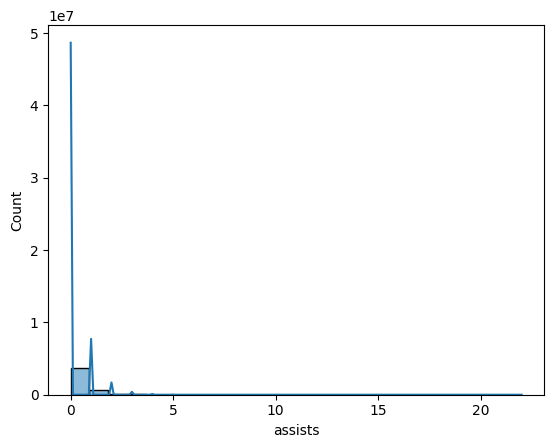

In [ ]:
sns.histplot(x='assists',data=df, kde=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'duo'),
  Text(2, 0, 'solo-fpp'),
  Text(3, 0, 'squad'),
  Text(4, 0, 'duo-fpp'),
  Text(5, 0, 'solo'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'crashfpp'),
  Text(8, 0, 'flaretpp'),
  Text(9, 0, 'normal-solo-fpp'),
  Text(10, 0, 'flarefpp'),
  Text(11, 0, 'normal-duo-fpp'),
  Text(12, 0, 'normal-duo'),
  Text(13, 0, 'normal-squad'),
  Text(14, 0, 'crashtpp'),
  Text(15, 0, 'normal-solo')])

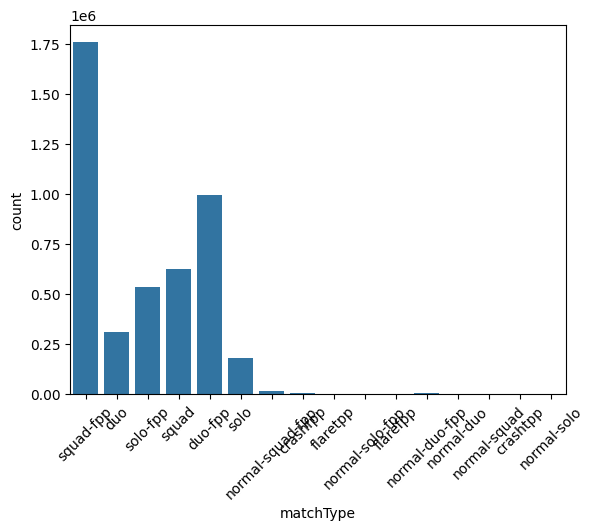

In [ ]:
sns.countplot(x='matchType',data=df)
plt.xticks(rotation=45)

<Axes: xlabel='boosts', ylabel='winPlacePerc'>

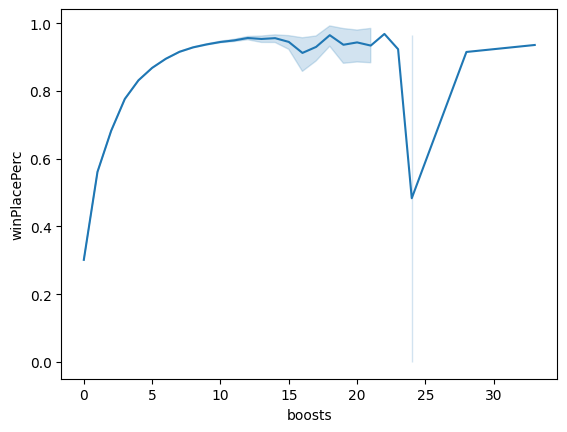

In [ ]:
sns.lineplot(x='boosts', y='winPlacePerc', data=df)

<Axes: xlabel='damageDealt'>

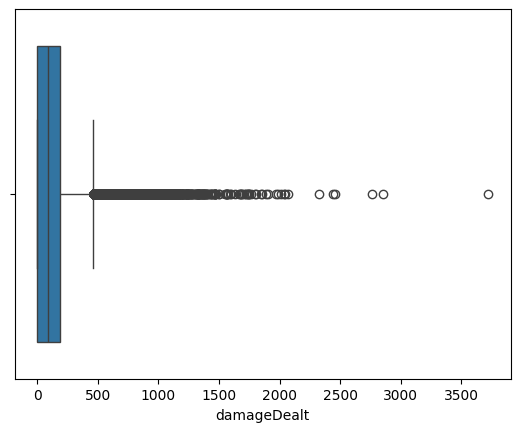

In [ ]:
sns.boxplot(x='damageDealt', data=df)

In [ ]:
df[df.damageDealt>2250]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2569,7711e1d39407da,a9fbc63469296f,45fc89f9b11eaf,1,4,2325.000000,13,8,2,1,1142,21,2.000000,192.100000,1376.000000,duo-fpp,49.000000,46.000000,-1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,2697.000000,5.000000,1505.000000,1.000000
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.000000,32,3,0,1,0,24,4.000000,84.230000,1195.000000,normal-squad-fpp,6.000000,6.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1136.000000,20.000000,0.000000,0.800000
37505,44513e16340a63,c1e3f56e09b9a4,cf5dd782577ea9,1,2,2767.000000,24,17,1,1,1355,22,3.000000,670.900000,1877.000000,squad,27.000000,26.000000,-1.000000,0.000000,2589.000000,0.000000,0.000000,0.000000,0.000000,3290.000000,7.000000,1509.000000,0.961500
44981,d41610382cf58d,8630aac72d130e,634edab75860b3,13,0,2439.000000,20,5,6,9,1000,19,3.000000,101.100000,1308.000000,normal-duo-fpp,14.000000,13.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.060000,34.000000,1500.000000,0.692300
57490,367599b150318a,0370e2f3be345b,5f2f9fcb9705af,6,0,2459.000000,0,3,0,2,0,23,3.000000,100.000000,910.000000,normal-duo-fpp,7.000000,6.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.500000,12.000000,0.000000,0.833300
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.000000,0,7,0,2,1000,35,3.000000,105.800000,1798.000000,normal-duo-fpp,8.000000,7.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.820000,48.000000,1500.000000,0.857100


these values seems to be normal

<Axes: xlabel='longestKill'>

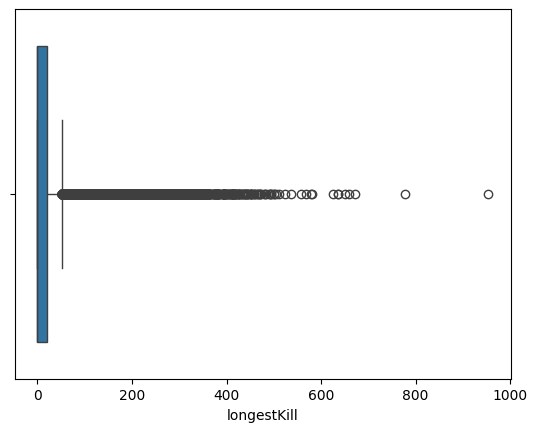

In [ ]:
sns.boxplot(x='longestKill', data=df)

values seems to be valid. so keeping the outliers

<Axes: xlabel='rideDistance'>

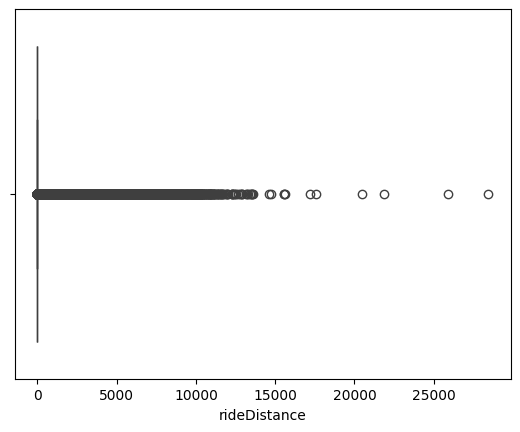

In [ ]:
sns.boxplot(x='rideDistance', data=df)

In [ ]:
df[df.rideDistance>15000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4906,8f05e600c7c8b8,560528edc46d1f,48167b9435e7c1,0,2,16.220000,0,0,2,48,1132,0,0.000000,0.000000,1816.000000,squad-fpp,29.000000,26.000000,-1.000000,0.000000,17210.000000,0.000000,0.000000,0.000000,0.000000,624.100000,3.000000,1520.000000,0.750000
16895,6da7b6c5cda276,d2982ffa6a2a3c,f5ec4d90b83c91,0,0,7.530000,0,0,0,40,1047,0,0.000000,0.000000,1779.000000,solo-fpp,87.000000,85.000000,0.000000,0.000000,15540.000000,0.000000,0.000000,0.000000,0.000000,635.400000,3.000000,1500.000000,0.941900
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.200000,0,0,1,30,0,1,1.000000,5.419000,1894.000000,solo,96.000000,89.000000,1642.000000,0.000000,25930.000000,0.000000,0.000000,0.000000,0.000000,376.600000,6.000000,0.000000,0.642100
48084,30abe4cbc9344d,4684bc6d097ae2,3646053157cc0b,0,0,0.000000,0,0,2,57,0,0,0.000000,0.000000,1962.000000,squad-fpp,28.000000,28.000000,1354.000000,0.000000,17570.000000,0.000000,0.000000,0.000000,0.000000,237.800000,2.000000,0.000000,0.518500
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.000000,0,0,0,55,0,0,0.000000,0.000000,1891.000000,solo,94.000000,88.000000,1529.000000,0.000000,21880.000000,0.000000,0.000000,0.000000,0.000000,185.400000,0.000000,0.000000,0.537600
67147,0dacf80c0b22ca,569c288b7fd2ee,31ae74ad13d5cc,0,0,0.000000,0,0,0,51,0,0,0.000000,0.000000,1859.000000,squad,29.000000,29.000000,1375.000000,0.000000,15610.000000,0.000000,0.000000,0.000000,0.000000,55.080000,0.000000,0.000000,0.607100
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.000000,0,0,0,26,0,1,1.000000,3.924000,1928.000000,solo,99.000000,95.000000,1512.000000,0.000000,28450.000000,1.000000,0.000000,0.000000,0.000000,467.500000,3.000000,0.000000,0.887800
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.000000,0,0,0,46,0,0,0.000000,0.000000,1807.000000,solo-fpp,97.000000,92.000000,1534.000000,0.000000,20510.000000,0.000000,0.000000,1.000000,0.000000,687.200000,9.000000,0.000000,0.791700
77927,bcf0ffe1cba6d7,5462bc18062856,ee051e232a8075,0,0,49.620000,0,0,6,55,988,0,0.000000,0.000000,1781.000000,duo,47.000000,46.000000,-1.000000,0.000000,15590.000000,0.000000,0.000000,0.000000,0.000000,252.600000,0.000000,1491.000000,0.630400


data seems to be valid. so keeping it

<Axes: xlabel='swimDistance'>

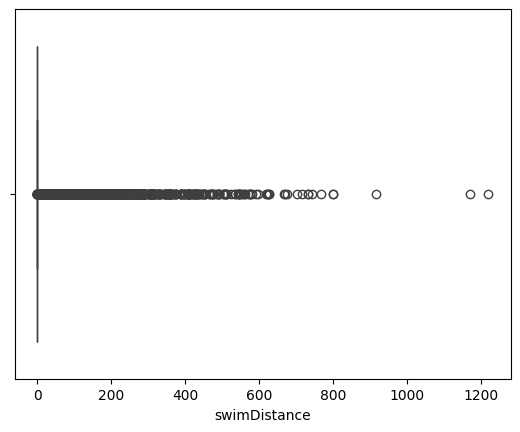

In [ ]:
sns.boxplot(x='swimDistance', data=df)

In [ ]:
df[df.swimDistance>800]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
18533,d8347ac3222087,4e44ea4cdee2bd,acacd3019c559e,0,0,0.000000,0,0,0,49,0,0,0.000000,0.000000,1852.000000,solo-fpp,96.000000,90.000000,1633.000000,0.000000,6672.000000,0.000000,1171.000000,0.000000,0.000000,914.000000,2.000000,0.000000,0.800000
22118,07f9b9d5902fb2,b295dcb7e8d9c1,6fbad77aefbcdf,0,0,0.000000,0,0,0,45,0,0,0.000000,0.000000,1805.000000,squad-fpp,30.000000,27.000000,1441.000000,0.000000,0.000000,0.000000,1220.000000,0.000000,0.000000,2069.000000,6.000000,0.000000,0.724100
26830,fc4ef4a2881cf1,5247befa0c1270,a6544afd10844d,0,2,0.000000,0,0,1,39,0,0,0.000000,0.000000,1844.000000,duo-fpp,50.000000,50.000000,1570.000000,0.000000,3816.000000,0.000000,917.400000,0.000000,0.000000,2010.000000,3.000000,0.000000,0.938800


not replacing the outlier since the data seems to be valid

<Axes: xlabel='walkDistance'>

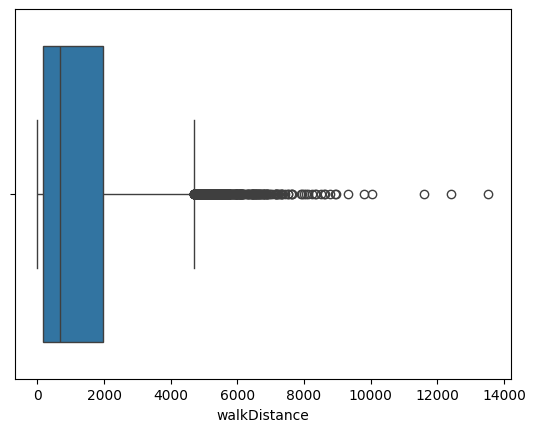

In [ ]:
sns.boxplot(x='walkDistance', data=df)

In [ ]:
df.loc[df.walkDistance>10000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.000000,0,0,0,44,0,0,0.000000,0.000000,1906.000000,solo,99.000000,93.000000,1517.000000,0.000000,0.421200,0.000000,9.882000,0.000000,0.000000,13530.000000,7.000000,0.000000,0.816300
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.220000,0,0,1,34,1256,0,0.000000,0.000000,1977.000000,squad-fpp,20.000000,20.000000,-1.000000,0.000000,0.037300,0.000000,40.870000,0.000000,0.000000,10030.000000,7.000000,1533.000000,0.947400
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.200000,1,0,1,24,0,1,1.000000,6.823000,2192.000000,duo-fpp,47.000000,46.000000,1507.000000,0.000000,0.008800,0.000000,36.750000,0.000000,0.000000,12410.000000,3.000000,0.000000,0.913000
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.340000,0,0,1,46,1378,0,0.000000,0.000000,1836.000000,duo-fpp,49.000000,47.000000,-1.000000,0.000000,847.800000,0.000000,45.820000,0.000000,0.000000,11590.000000,3.000000,1563.000000,0.833300


so they are all valid. keeping them

In [21]:
group=df.groupby(['matchId','groupId','matchType'])['Id'].count().to_frame('players')
group

players
matchId        groupId        matchType         
0000a43bce5eec 18b16ec699d8b6 squad-fpp        2
               236ab9e9c081b9 squad-fpp        6
               3a6addfa0df938 squad-fpp        2
               4bf06994bd4c9a squad-fpp        2
               4d1bbbc19b9084 squad-fpp        2
...                                          ...
fffe92232706aa b671eab579d429 squad-fpp        1
               bd5b4ecf8067ab squad-fpp        3
               c8e95cc6c06d41 squad-fpp        6
               d57f3a3ed40913 squad-fpp        4
               d8fa9cfd6f9560 squad-fpp        7

[2026744 rows x 1 columns]

In [22]:
df_group = group.reset_index()

In [23]:
df_group.head()

,matchId,groupId,matchType,players
0,0000a43bce5eec,18b16ec699d8b6,squad-fpp,2
1,0000a43bce5eec,236ab9e9c081b9,squad-fpp,6
2,0000a43bce5eec,3a6addfa0df938,squad-fpp,2
3,0000a43bce5eec,4bf06994bd4c9a,squad-fpp,2
4,0000a43bce5eec,4d1bbbc19b9084,squad-fpp,2



Squad Mode (4 players per team)

Duo Mode (2 players per team)

Solo Mode (1 player per team) in pubg Game . let us check this in our dataset

In [24]:
df_group.matchType.value_counts()

matchType
solo-fpp            523457
squad-fpp           506161
duo-fpp             486491
squad               177080
solo                168577
duo                 152324
normal-squad-fpp      3950
crashfpp              3130
normal-duo-fpp        2815
normal-solo-fpp       1227
flaretpp               695
normal-solo            232
flarefpp               200
crashtpp               180
normal-squad           124
normal-duo             101
Name: count, dtype: int64

In [25]:
#selecting matches which has  more than 4 players. In  a standard pubg Game a team has maximum 4 number of players.
remove = df_group.loc[df_group['players'] > 4].matchId.unique().tolist()

print(f"no. of matches which has more than 4 players in a group  :    {len(remove)}")

no. of matches which has more than 4 players in a group  :    29917


In [26]:
#removing those rows which has more than 4 players.
df_group= df_group[~df_group.matchId.isin(remove)]

In [27]:
df_group.loc[(df_group['matchType'] == 'solo') & (df_group['players'] > 1)]

,matchId,groupId,matchType,players
87,0002912fe5ed71,47f731a76523d0,solo,3
95,0002912fe5ed71,64b74fda2527e0,solo,2
1995,0044d2e8f90a9c,c0efae456b9bc8,solo,2
2186,004fb5a1da0f97,07c54213a78b06,solo,2
2192,004fb5a1da0f97,11674ff1db3d41,solo,2
...,...,...,...,...
2026422,fffa3a29e38094,63d2acd6e841bb,solo,2
2026424,fffa3a29e38094,66839e9f86f3e6,solo,2
2026459,fffa3a29e38094,cd7ff4ba5690d7,solo,2
2026460,fffa3a29e38094,ce7bdcf8b40e01,solo,2


removing those which have more than 1 player in solo match type

In [28]:
remove=df_group.loc[(df_group['matchType'] == 'solo') & (df_group['players'] > 1)].matchId.unique().tolist()

print(f"no. of matches which has more than 1 players in a group in solo matchType  :    {len(remove)}")

no. of matches which has more than 1 players in a group in solo matchType  :    1594


In [29]:
df_group = df_group[~df_group['matchId'].isin(remove)] # removing those rows

removing all the rows which has wrong no. of playets in the respective matchType.

In [30]:
remove = df_group.loc[(df_group['matchType'] == 'solo-fpp') & (df_group['players'] > 1)].matchId.unique().tolist()

print(f"no. of matches which has more than 1 player in a group in solo-fpp :    {len(remove)}")
df_group = df_group[~df_group.matchId.isin(remove)]

remove = df_group.loc[(df_group['matchType'] == 'duo') & (df_group['players'] > 2)].matchId.unique().tolist()

print(f"no. of matches which has more than 2 players in a group  in duo :    {len(remove)}")
df_group = df_group[~df_group.matchId.isin(remove)]

remove = df_group.loc[(df_group['matchType'] == 'duo-fpp') & (df_group['players'] > 2)].matchId.unique().tolist()

print(f"no. of matches which has more than 2 players in a group in duo-fpp  :    {len(remove)}")
df_group = df_group[~df_group.matchId.isin(remove)]

no. of matches which has more than 1 player in a group in solo-fpp :    4987
no. of matches which has more than 2 players in a group  in duo :    2113
no. of matches which has more than 2 players in a group in duo-fpp  :    7955


we removed those rows from the dataset df_group

now lets make these changes in our original dataframe df

In [31]:
df=df[df.matchId.isin(df_group.matchId.unique().tolist())]

In [32]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
106,cfa11f07d80695,1a4ffd9d6d597f,4563c0409f9115,0,3,76.440002,0,0,2,50,0,0,0,0.000000,1441,solo-fpp,95,95,1560,0,1054.000000,0,0.000000,0,0,1542.000000,2,0,0.883000
137,76e0fbe2b8f60c,5baf3c542b04ae,aedb3fefc7c3a4,0,0,37.730000,0,0,0,68,1335,0,0,0.000000,1349,solo-fpp,96,96,-1,0,0.000000,0,0.000000,0,0,101.800003,2,1602,0.347400
193,67e79b6a3aacc7,1c9169b09317bc,3a3f0763b3a692,0,0,79.199997,0,0,0,30,0,1,1,18.270000,1915,solo,91,91,1640,0,8677.000000,0,0.000000,0,0,664.900024,4,0,0.444400
211,e3bcf6441ccd67,d46dbf0c3a9606,6ed3a0442451ba,1,0,98.400002,0,0,0,62,0,0,0,0.000000,1322,solo-fpp,97,97,1500,0,0.000000,0,0.000000,0,0,656.200012,3,0,0.562500
251,8bfba106411922,caf29890057ddb,897fdfe4457764,0,0,156.800003,1,0,1,35,1006,0,0,0.000000,1383,duo-fpp,30,30,-1,0,751.299988,0,0.000000,0,0,960.299988,4,1490,0.482800


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105556 entries, 106 to 4446962
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               105556 non-null  object 
 1   groupId          105556 non-null  object 
 2   matchId          105556 non-null  object 
 3   assists          105556 non-null  int8   
 4   boosts           105556 non-null  int8   
 5   damageDealt      105556 non-null  float32
 6   DBNOs            105556 non-null  int8   
 7   headshotKills    105556 non-null  int8   
 8   heals            105556 non-null  int8   
 9   killPlace        105556 non-null  int8   
 10  killPoints       105556 non-null  int16  
 11  kills            105556 non-null  int8   
 12  killStreaks      105556 non-null  int8   
 13  longestKill      105556 non-null  float32
 14  matchDuration    105556 non-null  int16  
 15  matchType        105556 non-null  object 
 16  maxPlace         105556 non-null  int8  

now we have only 105556 entries.




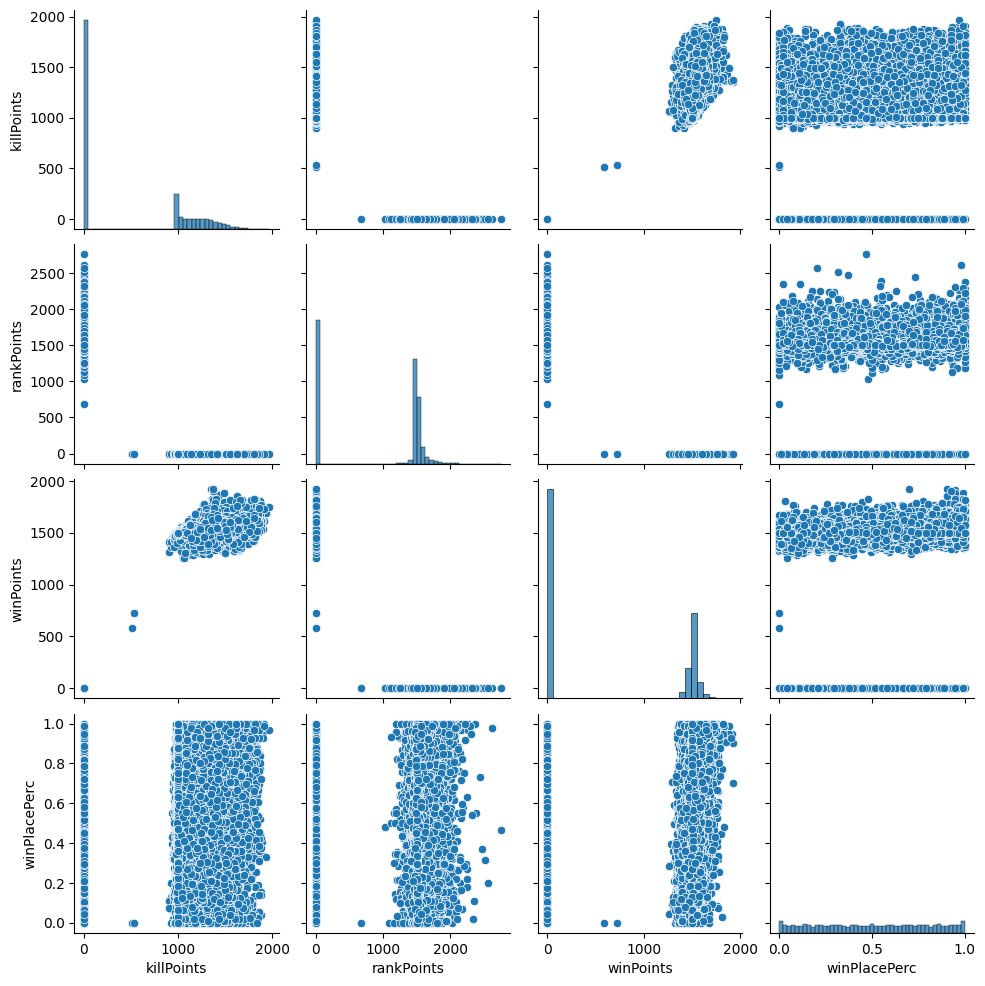

In [68]:
sns.pairplot(df[['killPoints','rankPoints','winPoints','winPlacePerc']])

here killpoints and winPoints are positively correlated.

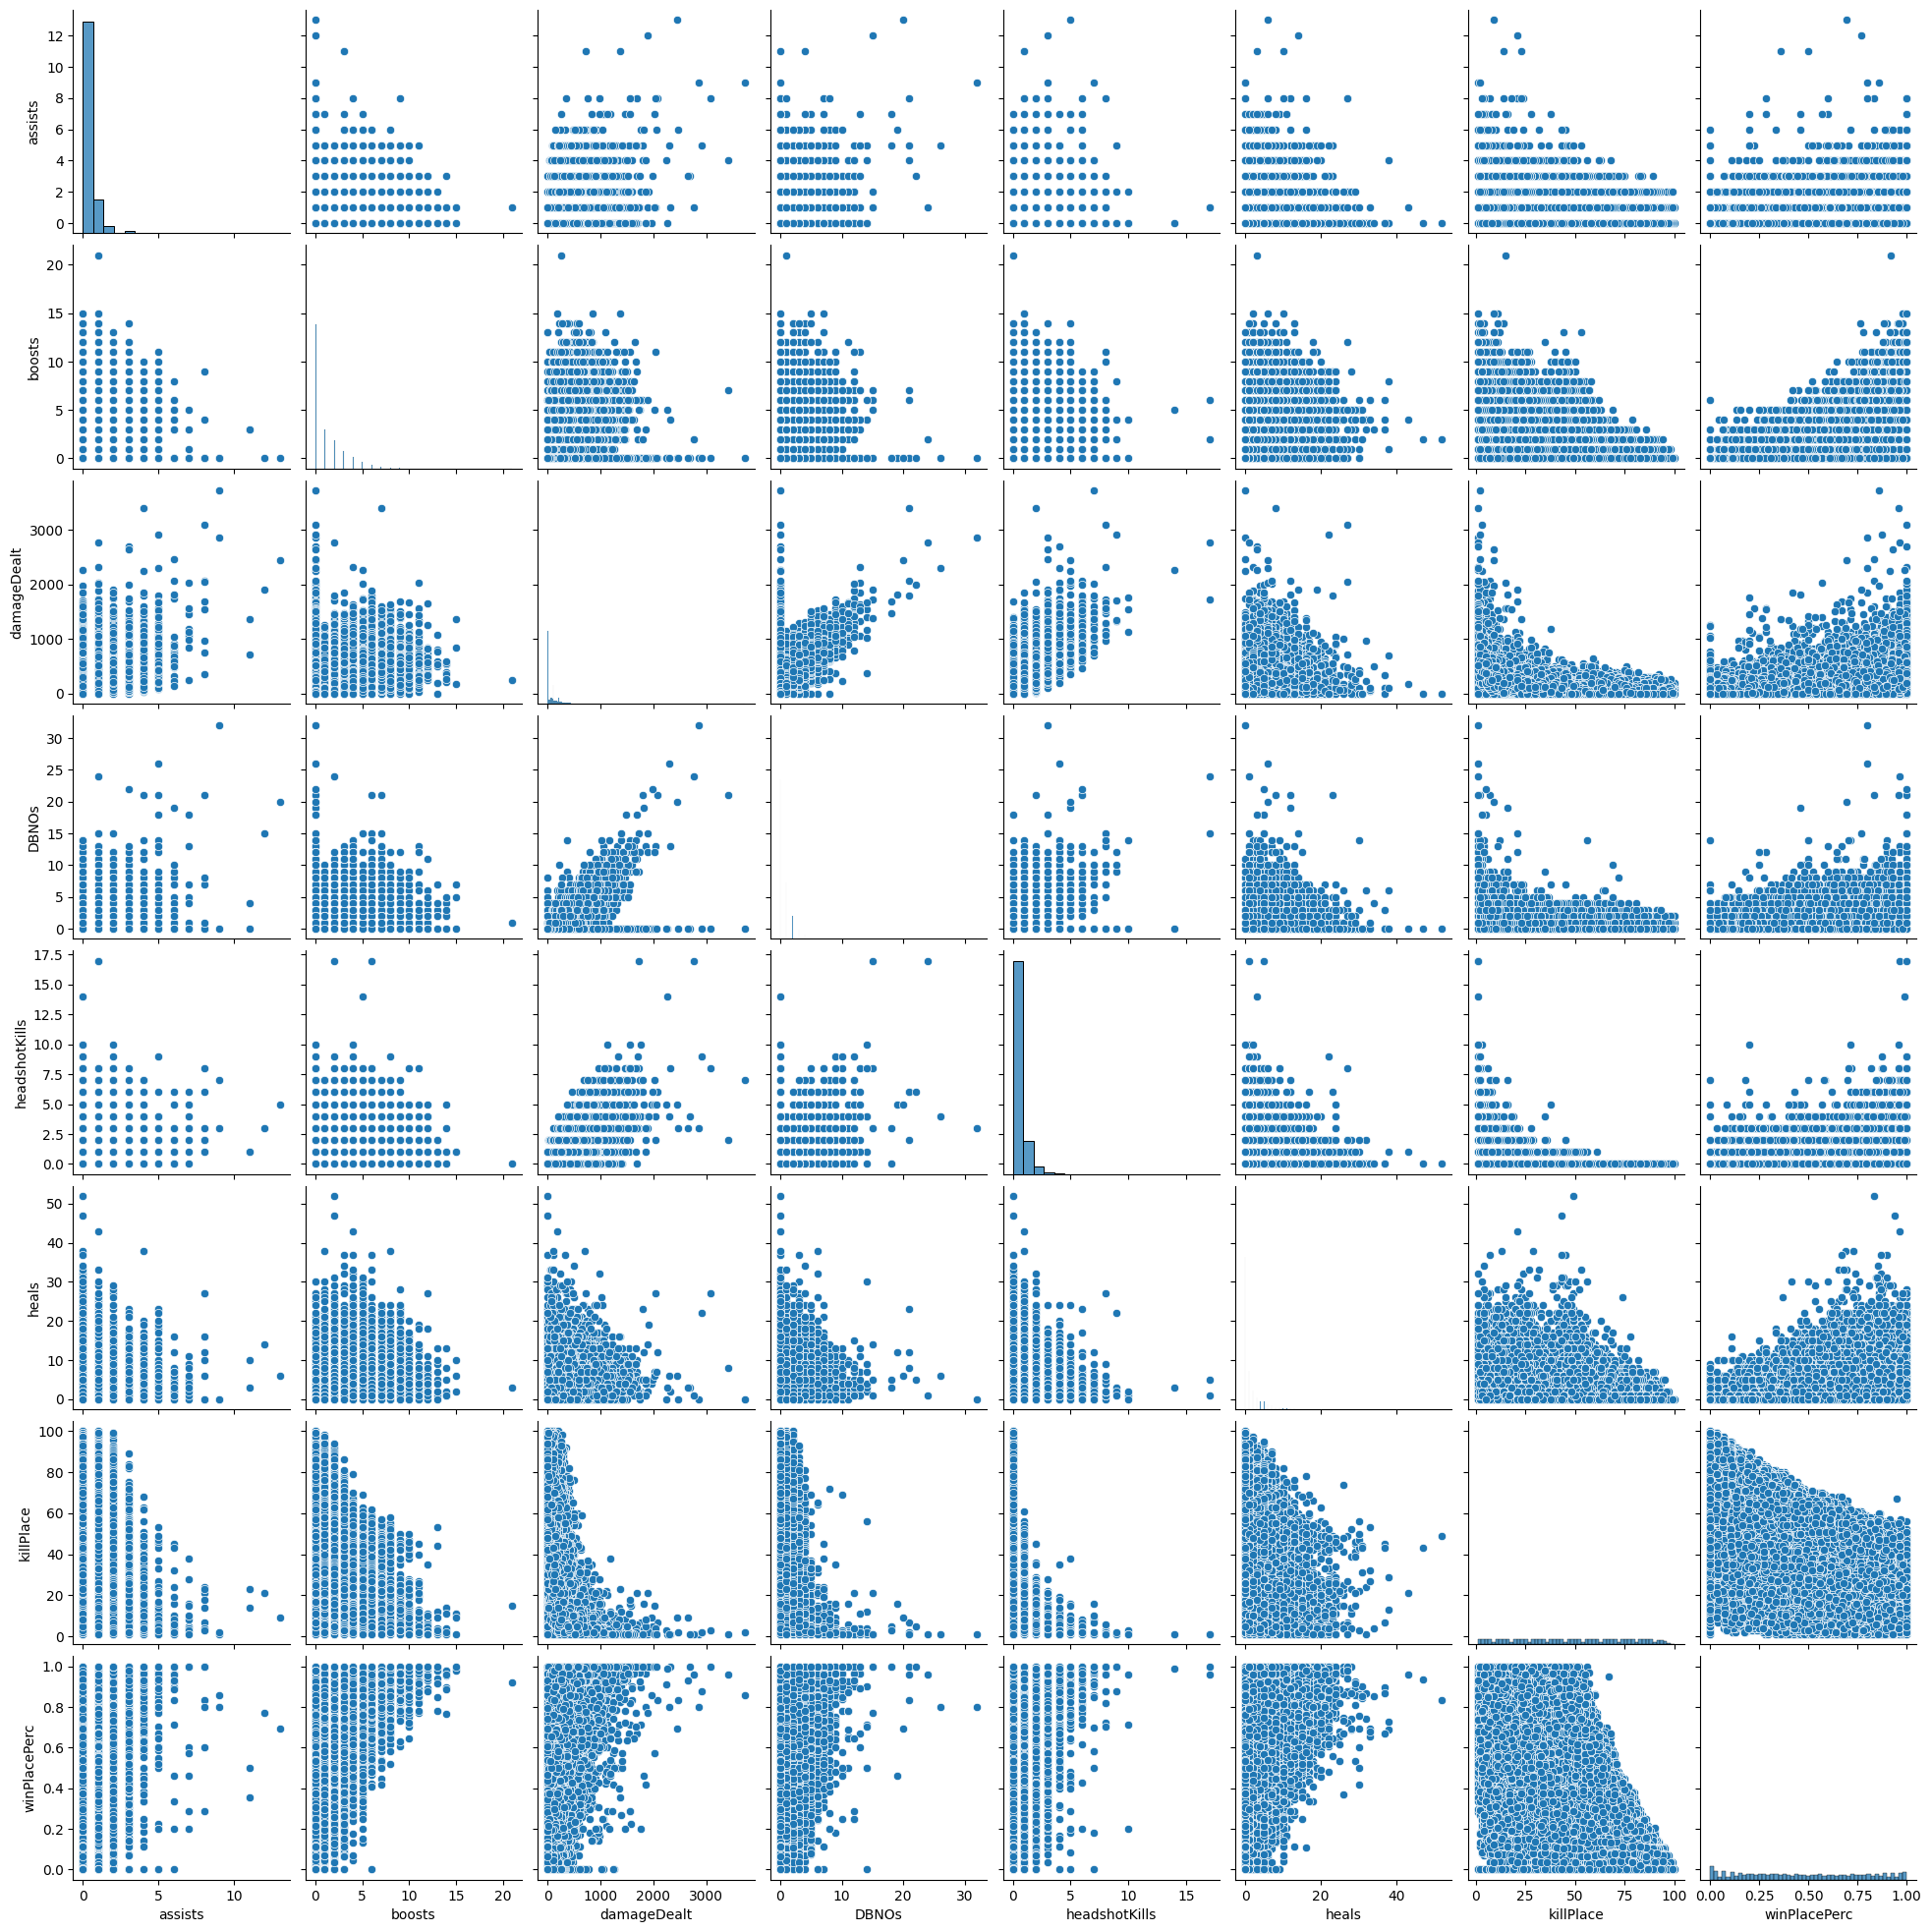

In [ ]:
sns.pairplot(df[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','winPlacePerc']])

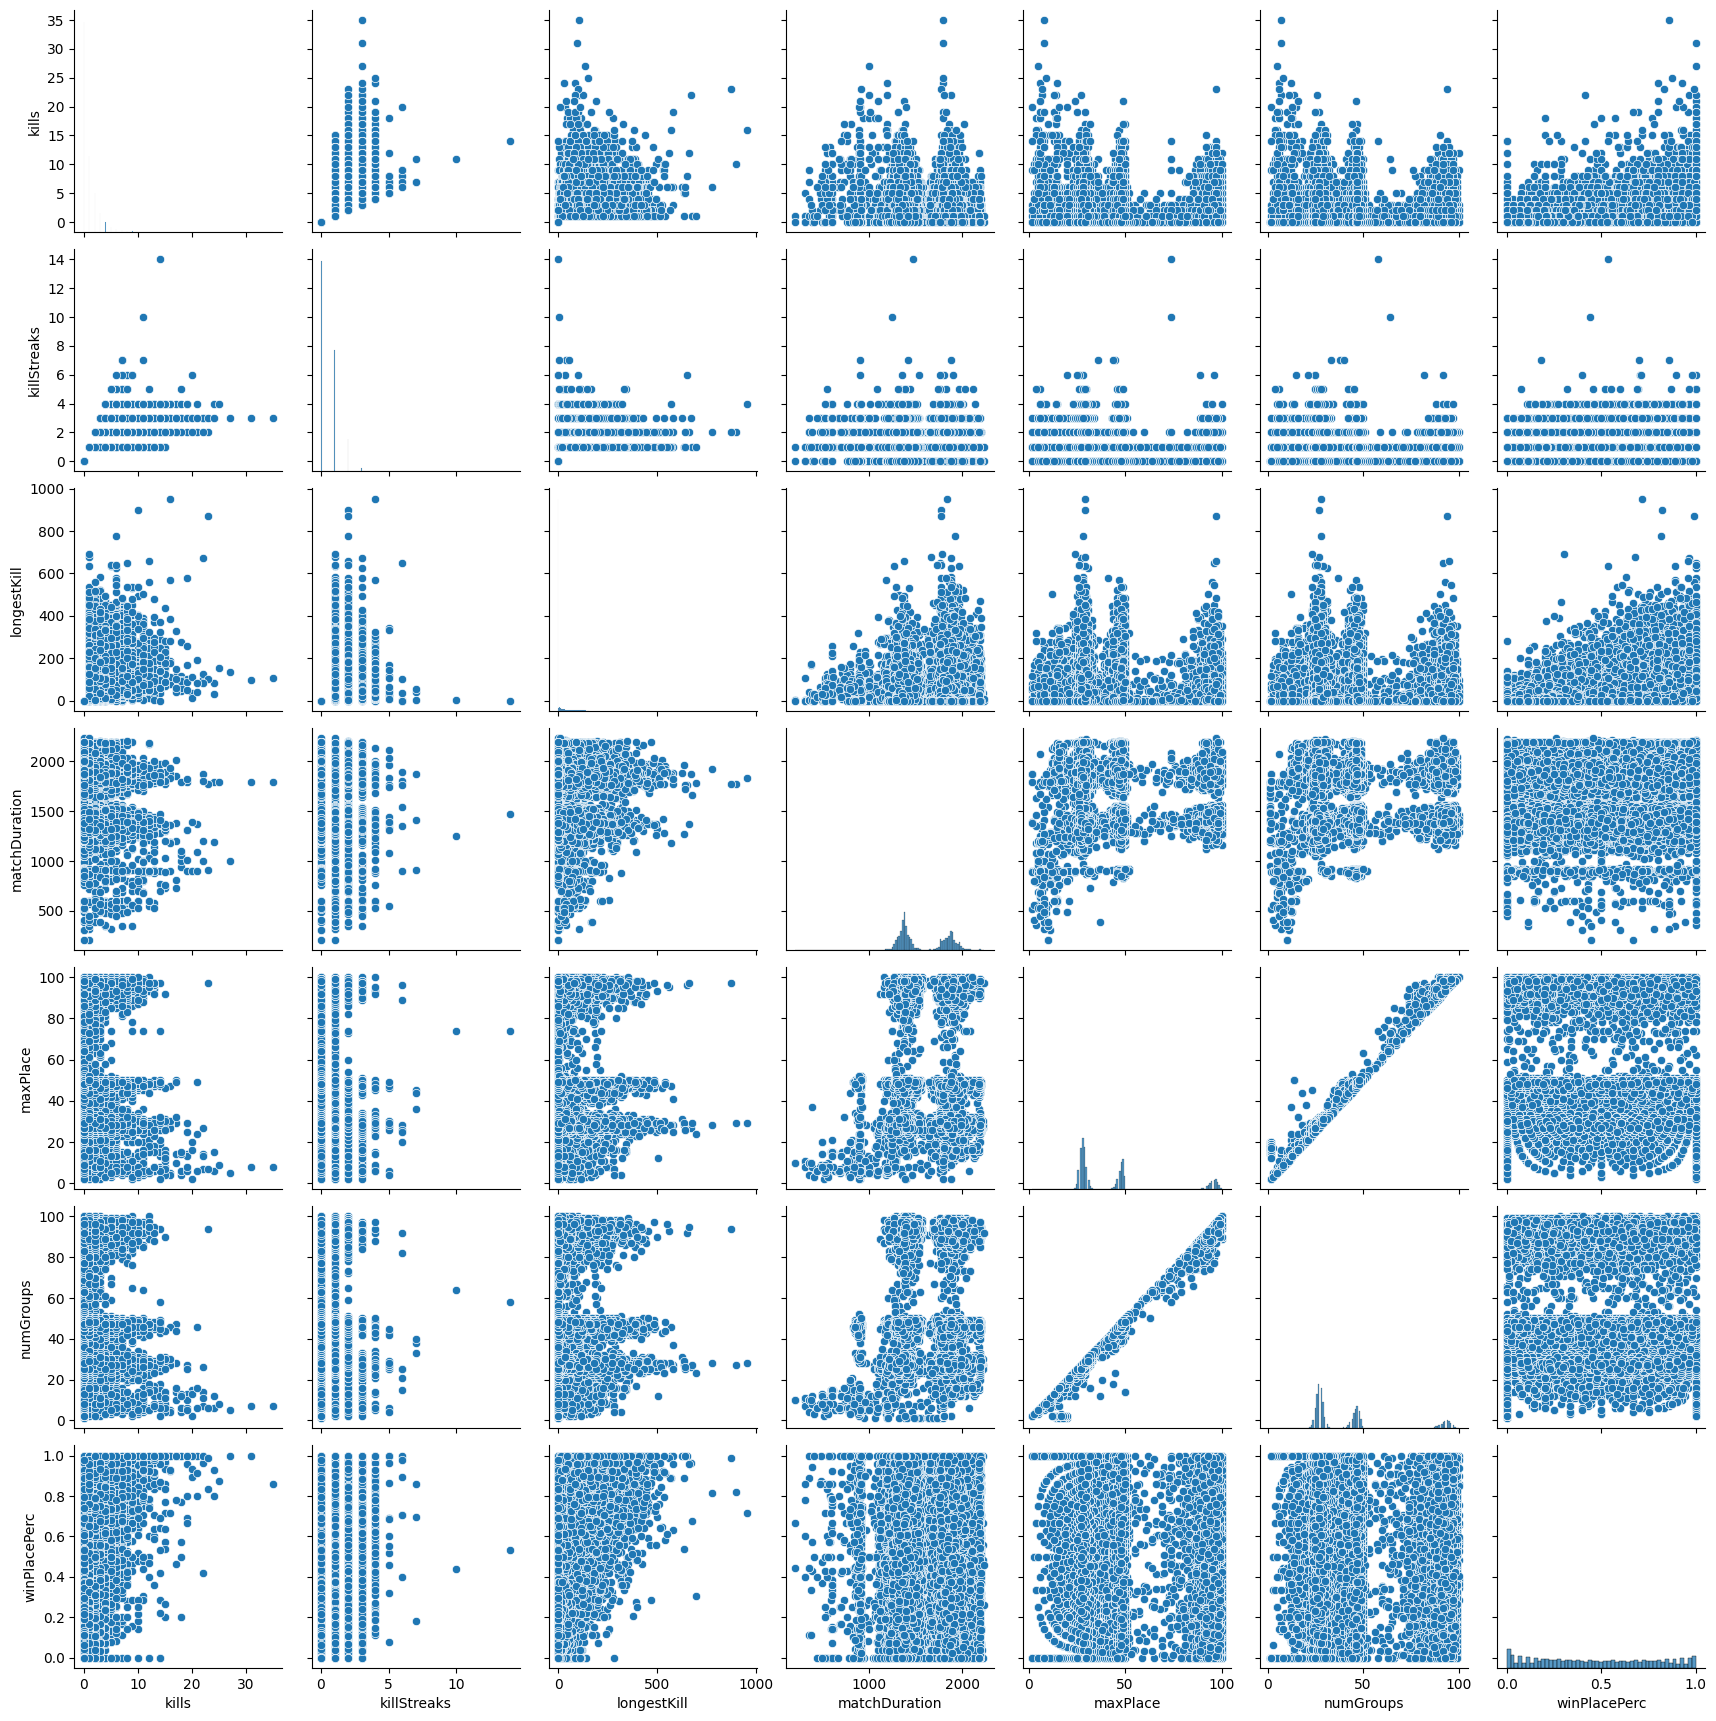

In [ ]:
sns.pairplot(df[['kills','killStreaks','longestKill','matchDuration','matchType','maxPlace','numGroups','winPlacePerc']])

i do see a strong positive correlation between maxPlace and numGroups

In [ ]:
numerical = df.select_dtypes(exclude='object')


<Axes: >

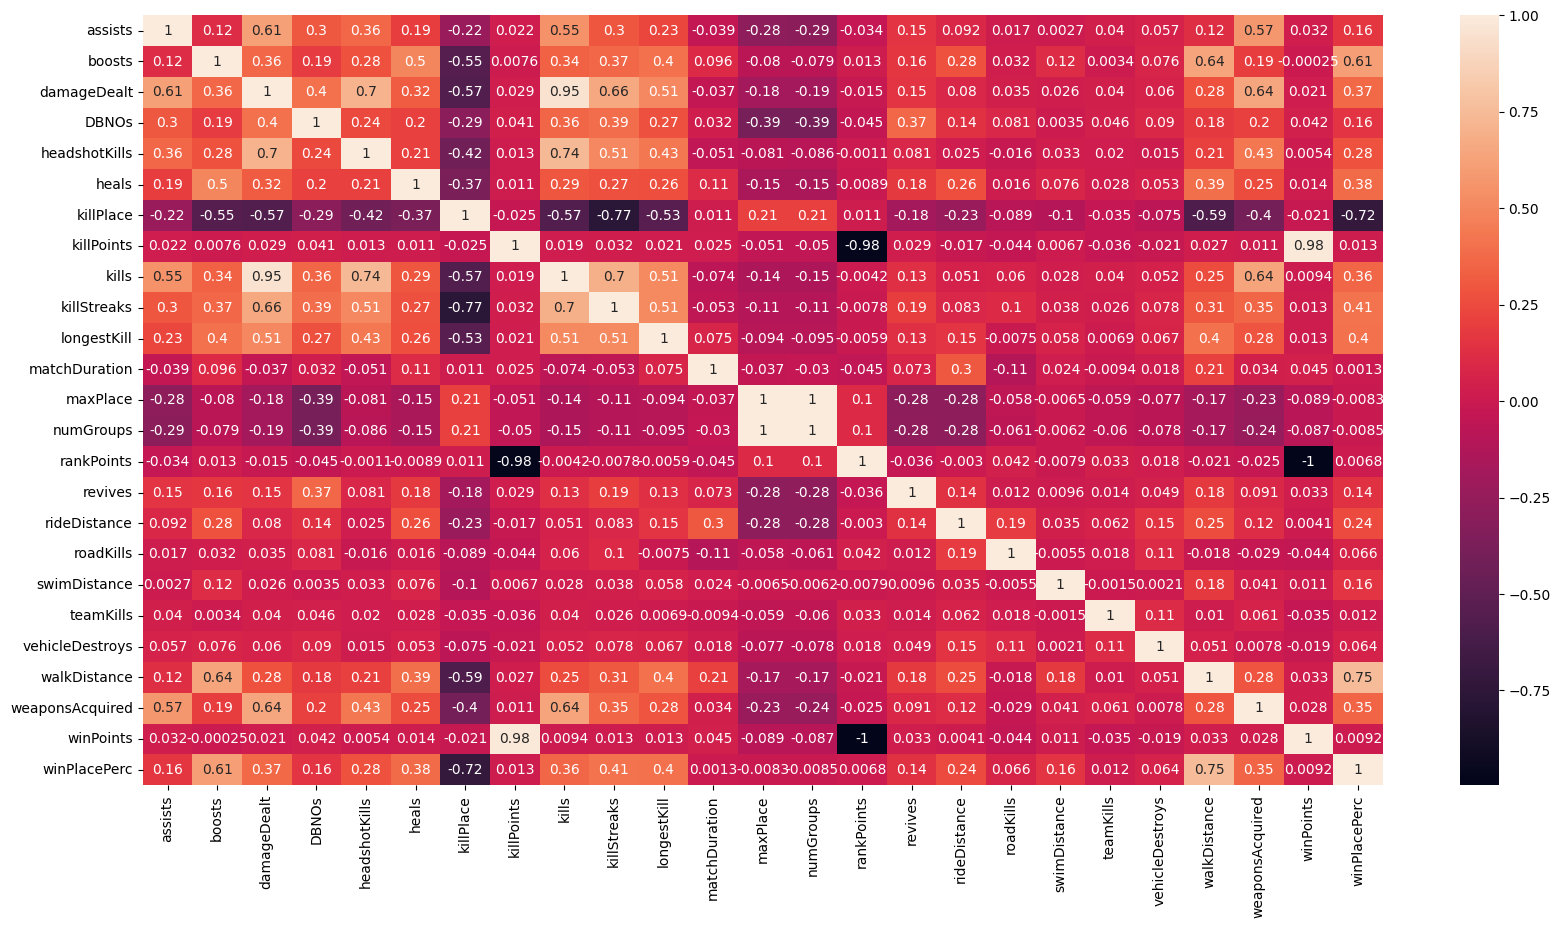

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical.corr(),annot=True)

kills & DamageDealt are strongly positively correlated.
killpoints and winPoints are strongly positively correlated.
killPoints and rankPoints are strongly negatively correlated.
maxPlace and numGroups are strongly positively correlated.
rankPoints and winPoints are strongly negatively correlated.


Feature Selection:
keeping DamageDealt and dropping kills since DamageDealt says about the overall performance.
winPoints we can keep here and drop killPoints.
keeping rankPoints(we are already dropping killPoints).
keeping numGroups and dropping maxPlace.
drop rankPoints since it is strongly negatively correlated with both winPoints and killPoints.



In [34]:
df_new=df.drop(['Id','groupId','matchId','maxPlace','kills','killPoints','rankPoints'], axis=1)

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Scaling and converting categorical to numerical

In [ ]:
df.matchType.unique()

array(['solo-fpp', 'solo', 'duo-fpp', 'squad-fpp', 'crashfpp',
       'normal-solo-fpp', 'normal-duo-fpp', 'normal-duo', 'duo',
       'normal-squad', 'normal-squad-fpp', 'squad', 'crashtpp',
       'normal-solo'], dtype=object)

In [36]:
from sklearn.preprocessing import *

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define a custom function to apply LabelEncoder
def label_encode(column):
    return label_encoder.fit_transform(column).reshape(-1, 1)

In [38]:
from sklearn.compose import ColumnTransformer
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('LabelEncoding', FunctionTransformer(label_encode, validate=False), ['matchType']),
        ('standardScalar', StandardScaler(), ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill', 'matchDuration',
       'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints'])
    ])

In [39]:
preprocessor

ColumnTransformer(transformers=[('LabelEncoding',
                                 FunctionTransformer(func=<function label_encode at 0x0000015F8943D3A0>),
                                 ['matchType']),
                                ('standardScalar', StandardScaler(),
                                 ['assists', 'boosts', 'damageDealt', 'DBNOs',
                                  'headshotKills', 'heals', 'killPlace',
                                  'killStreaks', 'longestKill', 'matchDuration',
                                  'numGroups', 'revives', 'rideDistance',
                                  'roadKills', 'swimDistance', 'teamKills',
                                  'vehicleDestroys', 'walkDistance',
                                  'weaponsAcquired', 'winPoints'])])

split x and y

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
y.shape

(105556,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=10)


In [43]:
X_train = preprocessor.fit_transform(x_train)

C:\Users\new\anaconda3_2\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
X_train.shape

(84444, 21)

In [81]:
y_train.shape

(84444,)

In [83]:
x_test.shape

(21112, 28)

## Model creation

In [84]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
X_test=preprocessor.fit_transform(x_test)
X_test[:2]

C:\Users\new\anaconda3_2\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[13.        , -0.26368737,  1.05334628, -0.60456598,  0.83895564,
        -0.35082045, -0.46726364,  0.25655013, -0.8155005 , -0.46524543,
        -0.43737134, -1.48526227, 13.4317112 ,  0.8933928 , -0.07943459,
        -0.16358466, -0.11969292, -0.08457889, -0.08185159, -0.2154904 ,
        -0.83512741],
       [10.        , -0.26368737,  0.49379501, -0.60456598, -0.3099826 ,
        -0.35082045, -0.08042116, -0.21321841, -0.8155005 , -0.46524543,
         1.67746615,  0.56369215, -0.2252769 , -0.37273255, -0.07943459,
         1.12446332, -0.11969292, -0.08457889,  2.44637656,  0.03565138,
        -0.83512741]])

In [86]:
y_pred= lr.predict(X_test)
y_trainPred=lr.predict(X_train)

In [87]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")





Mean Absolute Error (MAE): 0.10517049378678896
Mean Squared Error (MSE): 0.02039715227971283
Root Mean Squared Error (RMSE): 0.1428185992079212
R-squared (R²): 0.7654224488061053


 R-squared represents the proportion of variance in the target variable (winPlacePerc) that your model is able to explain. In this case, 76.54% of the variance is explained by our model, which is a good result for a linear regression model.

In [88]:
# SVR

from sklearn.svm import SVR
# Create the SVR model
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train)

SVR()

In [ ]:
# Predicting on the test set
y_pred = svr.predict(X_test)

y_trainPred=lr.predict(X_train)

# R-squared (R²)
r2 = r2_score(y_train, y_trainPred)
print(f"R-squared (R²) for training dataset: {r2}")

R-squared (R²) for training dataset: 0.7710763597923309


In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.10517049378678896
Mean Squared Error (MSE): 0.02039715227971283
Root Mean Squared Error (RMSE): 0.1428185992079212
R-squared (R²): 0.7654224488061053


#### The MAE of 0.1052 indicates that, on average, the SVR model’s predictions are off by about 0.1052 units from the actual values. This gives an intuitive sense of the average error magnitude.
#### The MSE of 0.0204 measures the average squared difference between predicted and actual values. 
#### The RMSE of 0.1428 represents the average error magnitude in the same units as the target variable. The 0.1428 indicates a moderate prediction error, meaning the SVR model has some room for improvement.
#### The R² score of 0.7654 means that the SVR model explains 76.54% of the variance in the target variable. This suggests that the model is able to capture the relationship between features and the target to a moderate degree

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()             #object creation for decision tree
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [50]:
y_trainPred=dt.predict(X_train)
y_pred=dt.predict(X_test)
# R-squared (R²)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_trainPred, y_train)
print(f"R-squared (R²) for training dataset: {r2}")

R-squared (R²) for training dataset: 1.0


In [51]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.07833016779508079
Mean Squared Error (MSE): 0.015779023440924685
Root Mean Squared Error (RMSE): 0.1256145829150608
R-squared (R²): 0.8185332630127661


#### decision tree model is overfitting here

#### lets do hyperparameter tuning to reduce this overfitting

In [53]:
dt1=DecisionTreeRegressor()

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': np.linspace(0.0, 0.1, 10)
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=dt1, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error')

In [55]:
# Fit the random search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   param_distributions={'ccp_alpha': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   scoring='neg_mean_squared_error')

In [57]:
# Best hyperparameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
print("Training set score: ", best_model.score(X_train, y_train))
print("Test set score: ", best_model.score(X_test, y_test))

Best parameters found:  {'min_samples_split': 13, 'min_samples_leaf': 11, 'max_features': None, 'max_depth': None, 'ccp_alpha': 0.0}
Training set score:  0.9337665712548547
Test set score:  0.8740720054318479


### the  decision tree model is generalizing reasonably well to unseen data

In [99]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor   # importing randomforest

rf= RandomForestRegressor(n_estimators=100,verbose=2,n_jobs=-1) #  RandomForest CLassifier into variable
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.5s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestRegressor(n_jobs=-1, verbose=2)

In [100]:
# Score the model on the training data
train_score = rf.score(X_train, y_train)
print(f"Training R² score: {train_score}")

# Score the model on the test data
test_score = rf.score(X_test, y_test)
print(f"Test R² score: {test_score}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Training R² score: 0.9880247775183785


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s


Test R² score: 0.9093085417537073


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [105]:
# Calculate predictions on the test set
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
# Mean Squared Error (MSE)

mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Test set MSE: {mse_test}")

# Root Mean Squared Error (RMSE)

rmse_test = np.sqrt(mse_test)

print(f"Test set RMSE: {rmse_test}")

# Mean Absolute Error (MAE)

mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test set MAE: {mae_test}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s


Test set MSE: 0.007885867511138228
Test set RMSE: 0.08880240712468457
Test set MAE: 0.05690695679945167


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


### the MSE of 0.0078 indicates that the Random Forest model's predictions have a small average squared difference from the actual values, indicating a good fit.
### The RMSE of 0.0888 suggests that the average error is approximately 0.0827 units
### The MAE of 0.0569 indicates that, on average, the model's predictions are off by about 0.0527 units from the actual values, showing that the Random Forest model is accurately predicting the target variable
### The R² score of ~0.9094 on the test set means the model explains 90.94% of the variance in the test data. This is a strong performance and suggests that the model generalizes well to unseen data

In [89]:
#XGBoost
import xgboost
from xgboost import XGBRegressor#importing the model library

xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
# Make predictions
y_pred = xgb_model.predict(X_test)
y_trainPred=xgb_model.predict(X_train)

# Evaluate the model
r2 = r2_score(y_trainPred, y_train)
print(f"R-squared (R²) for training dataset XGBoost: {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(" ***************for testing dataset XGBoost*************")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

R-squared (R²) for training dataset XGBoost: 0.9421703688816561
 ***************for testing dataset XGBoost*************
Mean Squared Error: 0.007231515366584063
Root Mean Squared Error: 0.08503831923007965
R-squared: 0.916833922850242


#### we are doing hyperparameter tuning to improve the model performance

In [91]:
# Define the XGBoost Regressor model
xgb_model =XGBRegressor(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'min_child_weight': randint(1, 10),
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [92]:
# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   scoring='neg_mean_squared_error', 
                                   cv=2, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

In [93]:
# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 192, 'subsample': 0.9}


In [94]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_

In [103]:

train_score = best_model.score(X_train, y_train)
print(f"Train score R^2: {train_score}")
test_score = best_model.score(X_test, y_test)
print(f"Test set R^2: {test_score}")

Train score R^2: 0.96231637970066
Test set R^2: 0.9212860941651151


In [104]:

# Calculate predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
# Mean Squared Error (MSE)

mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Test set MSE: {mse_test}")

# Root Mean Squared Error (RMSE)

rmse_test = np.sqrt(mse_test)

print(f"Test set RMSE: {rmse_test}")

# Mean Absolute Error (MAE)

mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test set MAE: {mae_test}")

Test set MSE: 0.006844386458396912
Test set RMSE: 0.08273080736398697
Test set MAE: 0.05273671820759773


#### MSE indicates the average squared difference between the predicted and actual values. A lower value suggests a better model fit, and in this case, the model is performing quite well.
#### The 0.0827 RMSE suggests that the predictions are quite close to the actual values.
#### The MAE shows that, on average, the model's predictions are off by about 0.0527 units from the actual values, which indicates a small error and that the model is doing a good job of minimizing large deviations.


In [101]:
#GradientBOOST
from sklearn.ensemble import GradientBoostingRegressor  # Importing GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [102]:
y_trainPred=gbm.predict(X_train)
y_pred= gbm.predict(X_test)

In [103]:
# Evaluate the model
r2 = r2_score(y_trainPred, y_train)
print(f"R-squared (R²) for training dataset Gradient Boost : {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(" ***************for testing dataset  Gradient Boost*************")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

R-squared (R²) for training dataset Gradient Boost : 0.8578833746558725
 ***************for testing dataset  Gradient Boost*************
Mean Squared Error: 0.010824412964848458
Root Mean Squared Error: 0.10404043908427366
R-squared: 0.8755137848859877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### The MSE of 0.01082 indicates the average squared difference between the predicted and actual values. A lower MSE generally means better model performance, and in this case, the error is relatively small.
###  The RMSE of 0.1040 is the square root of the MSE. RMSE gives a more interpretable measure of the error since it is in the same units as the target variable. An RMSE of 0.1040 suggests that the model’s predictions, on average, deviate from the actual values by about 0.104 units.
### The R² score of 0.8755 means that the model explains 87.55% of the variance in the target variable. This shows that the Gradient Boosting model captures a large portion of the variance, but there’s still room for improvement.

In [77]:
# Knn
from sklearn.neighbors import KNeighborsRegressor
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

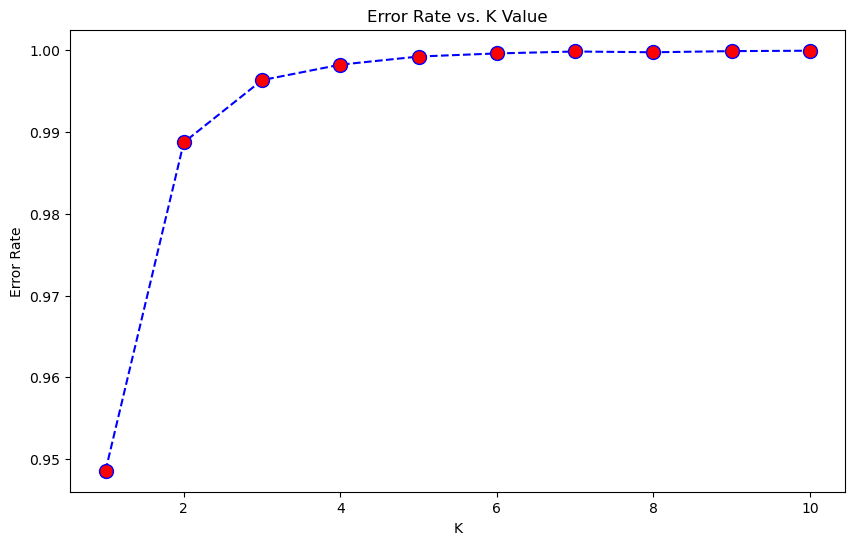

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):

    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_trainSmote,Y_trainSmote)  #fit the model
    pred=model.predict(x_Test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [79]:
knn1 = KNeighborsRegressor(n_neighbors=2)
knn1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [80]:
y_pred = knn1.predict(X_test)

In [82]:
y_trainPred=knn1.predict(X_train)

In [87]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_train= r2_score(y_train, y_trainPred)

print(f'MSE for Knn: {mse}')
print(f'RMSE for Knn: {rmse}')
print(f'R² Score for Knn testing dataset: {r2}')
print(f'R² Score for Knn training dataset: {r2_train}')


MSE for Knn: 0.014997551217675209
RMSE for Knn: 0.12246449291706085
R² Score for Knn testing dataset: 0.8275205955401265
R² Score for Knn training dataset: 0.9421852910641131


### MSE of 0.0150 indicates the average squared difference between predicted and actual values, which is moderately low.
### RMSE of 0.1225 suggests that, on average, the KNN model's predictions deviate from the actual values by 0.1225 units. This gives a good understanding of the typical prediction error.
### Test R² of 0.8275 means the model explains 82.75% of the variance in the test data

## Comparison between the models

 so Random Forest and XGboost are the best models for this dataset.
 Random Forest:
Test set MSE: 0.0079
Test set RMSE: 0.0888
Test set MAE: 0.0569
Training R² score: 0.9880
Test R² score: 0.9093
XGBoost:
Train score R²: 0.9623
Test set R²: 0.9213
Test set MSE: 0.0068
Test set RMSE: 0.0827
Test set MAE: 0.0527
Both models have a similar MSE, indicating that both are producing small average squared errors in their predictions. XGBoost has a slightly lower MSE, suggesting it is making slightly better predictions compared to Random Forest.
RMSE indicates how much the predicted values deviate from the actual values on average. XGBoost has a slightly lower RMSE, implying that it is providing more accurate predictions with less error on average.

 Both models have very similar MAE values. However, XGBoost has a slightly lower MAE, suggesting it is a bit better at minimizing the average absolute deviation from the actual values.
 Random Forest has a higher training R² score, which means it fits the training data better. However, XGBoost outperforms Random Forest on the test set R², showing better generalization and less overfitting. XGBoost's higher test R² suggests it is better at predicting new, unseen data.
 

##### XGBoost generally performs better than Random Forest in terms of generalization (test set R²) and has slightly lower prediction errors (MSE, RMSE, MAE).
##### Random Forest fits the training data better (higher training R²), but its performance on unseen data (test set) is a bit lower compared to XGBoost.